<a href="https://colab.research.google.com/github/pannavich/2143488_Big_Data_and_AI/blob/main/HW5_ARIMA-Time-Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Big Data AI/HW5/HW5_PRSA_Data_Tiantan_20130301-20170228.csv')
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [ ]:
df.dtypes

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

In [ ]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [ ]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [ ]:
df_pressure = pd.DataFrame()
df_pressure['PRES']=df['PRES']
df_pressure['No']=df['No']

for i in range(len(df)):
  df_pressure.at[i,'Timestamp']=str(df.loc[i,'year'])+'-'+str(df.loc[i,'month'])+'-'+str(df.loc[i,'day'])+' '+str(df.loc[i,'hour'])


In [ ]:
df_pressure.head(25)

,PRES,No,Timestamp
0,1024.5,1,2013-3-1 0
1,1025.1,2,2013-3-1 1
2,1025.3,3,2013-3-1 2
3,1026.2,4,2013-3-1 3
4,1027.1,5,2013-3-1 4
5,1027.5,6,2013-3-1 5
6,1028.2,7,2013-3-1 6
7,1029.5,8,2013-3-1 7
8,1030.4,9,2013-3-1 8
9,1030.5,10,2013-3-1 9


In [ ]:
def fillnaConsecMean(df,col='PRES'):
  row = len(df)
  df=df.fillna(0)
  for i in range(0,row):
    if(df.loc[i,col]==(0)):
      j=1
      while(df.loc[i+j,col]==0):
        j=j+1
      k=1
      while(df.loc[i-k,col]==0):
        k=k+1
      df.loc[i,col]=(df.loc[i+j,col]+df.loc[i-k,col])/2
  return df
df_pressure = fillnaConsecMean(df_pressure)
df_pressure

,PRES,No,Timestamp
0,1024.5,1,2013-3-1 0
1,1025.1,2,2013-3-1 1
2,1025.3,3,2013-3-1 2
3,1026.2,4,2013-3-1 3
4,1027.1,5,2013-3-1 4
...,...,...,...
35059,1013.5,35060,2017-2-28 19
35060,1013.6,35061,2017-2-28 20
35061,1014.2,35062,2017-2-28 21
35062,1014.4,35063,2017-2-28 22


In [ ]:
pressure = df_pressure['PRES']
pressure = np.array(pressure)
pressure
pres = pd.Series(pressure, index=pd.date_range('2013-3-1', periods=len(df), freq='H'), name = 'PRES')
pres

2013-03-01 00:00:00    1024.5
2013-03-01 01:00:00    1025.1
2013-03-01 02:00:00    1025.3
2013-03-01 03:00:00    1026.2
2013-03-01 04:00:00    1027.1
                        ...  
2017-02-28 19:00:00    1013.5
2017-02-28 20:00:00    1013.6
2017-02-28 21:00:00    1014.2
2017-02-28 22:00:00    1014.4
2017-02-28 23:00:00    1014.1
Freq: H, Name: PRES, Length: 35064, dtype: float64

In [ ]:
pres_daily = pres.resample('1D').mean()
print(pres_daily)

2013-03-01    1028.783333
2013-03-02    1028.850000
2013-03-03    1016.458333
2013-03-04    1019.454167
2013-03-05    1012.704167
                 ...     
2017-02-24    1021.012500
2017-02-25    1018.812500
2017-02-26    1020.337500
2017-02-27    1017.141667
2017-02-28    1014.887500
Freq: D, Name: PRES, Length: 1461, dtype: float64


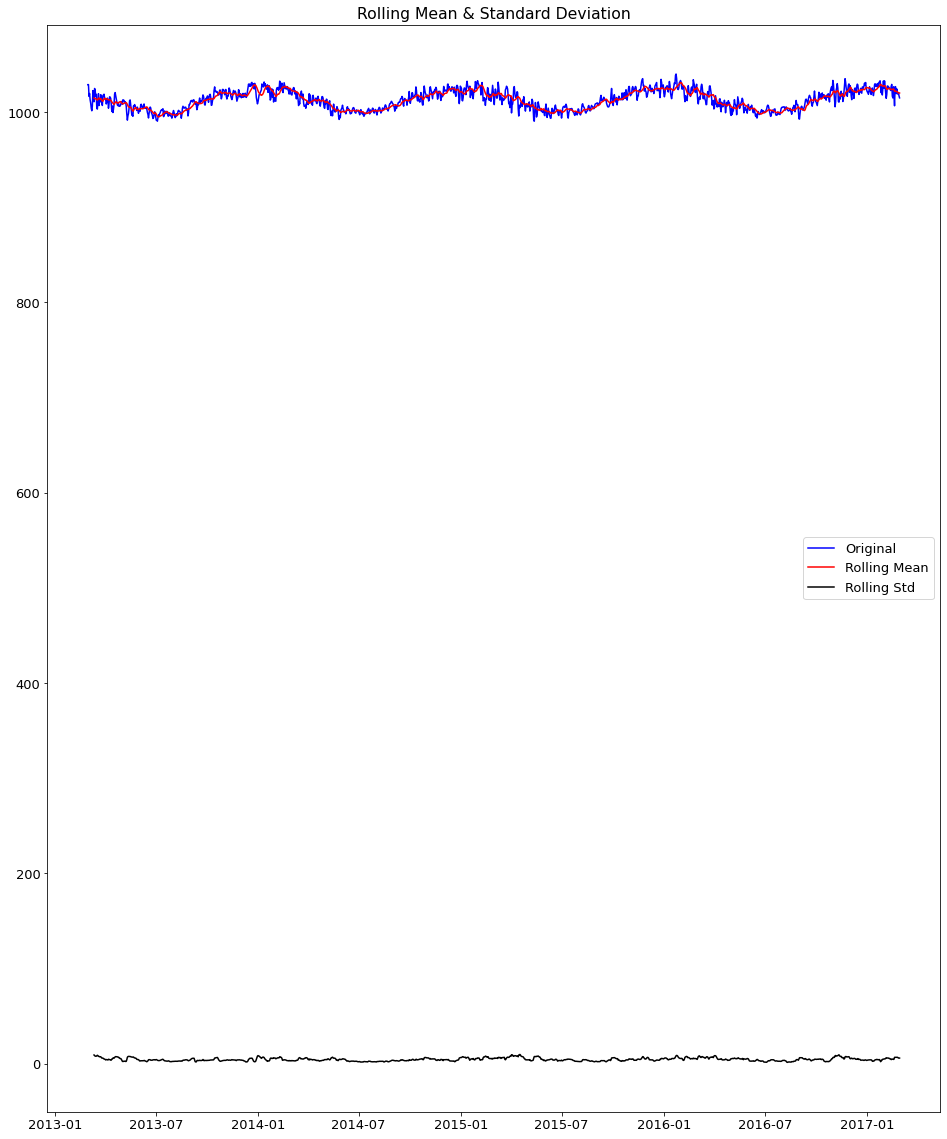

In [ ]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
get_stationarity(pres_daily)

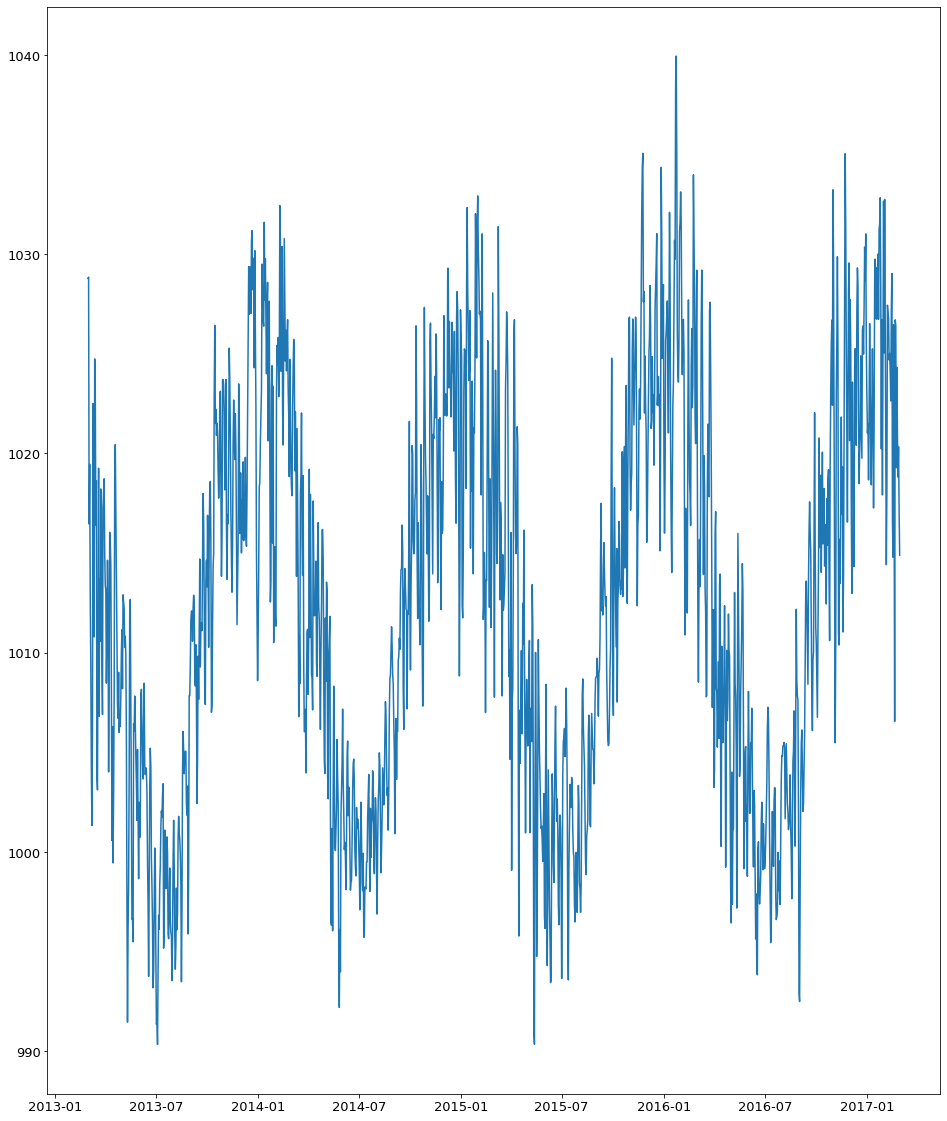

In [ ]:
plt.plot(pres_daily)
#already stationary

In [ ]:
!pip install statsmodels==0.12.1


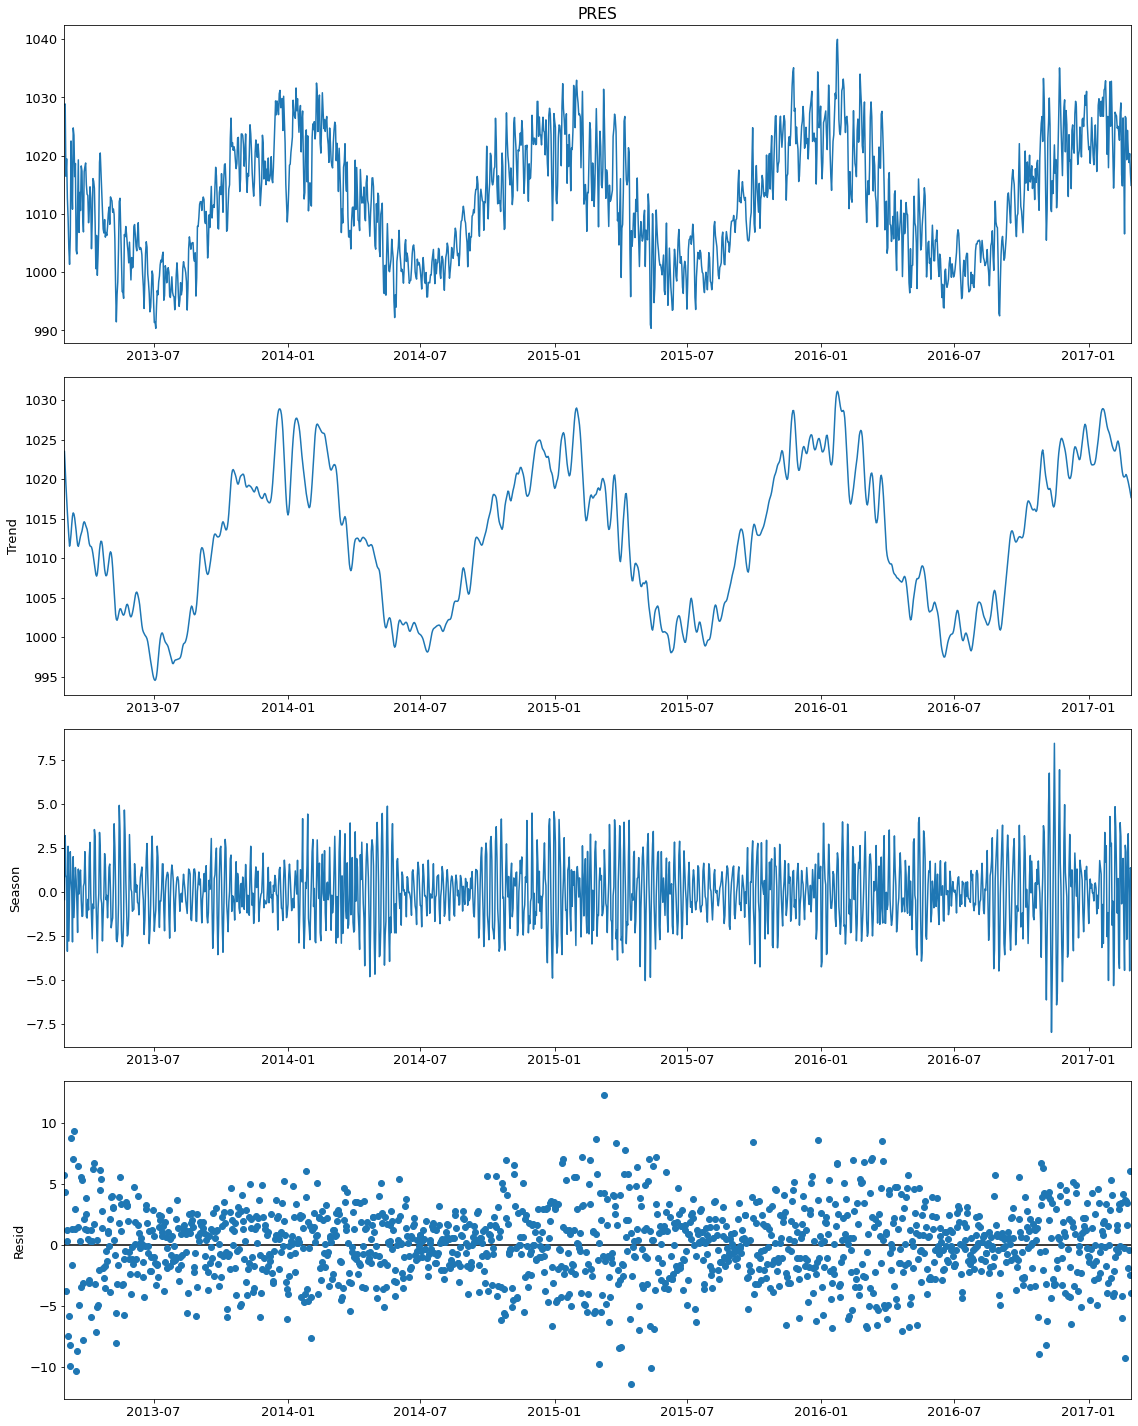

In [ ]:
from statsmodels.tsa.seasonal import STL
plt.rc('figure',figsize=(16,20))
plt.rc('font',size=13)
stl = STL(pres_daily)
res = stl.fit()
fig = res.plot()

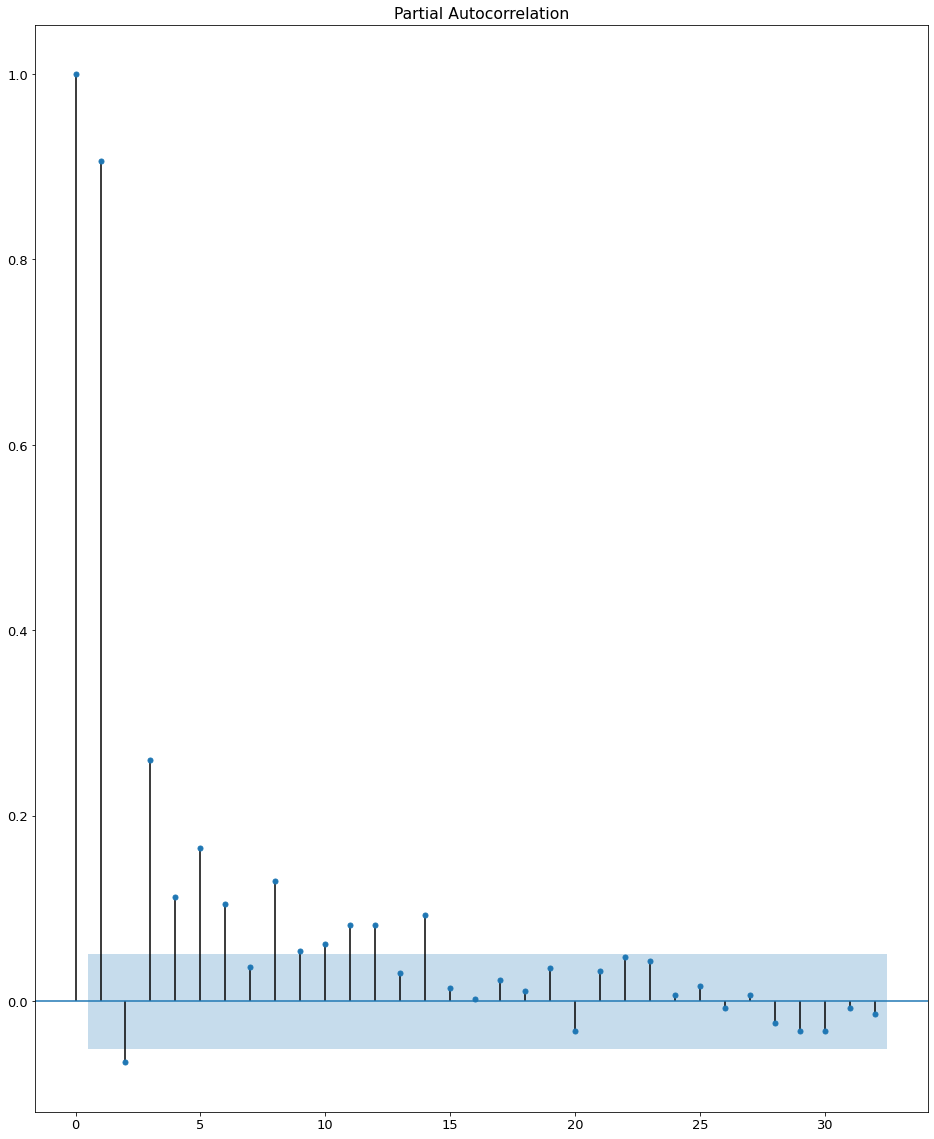

<Figure size 864x288 with 0 Axes>

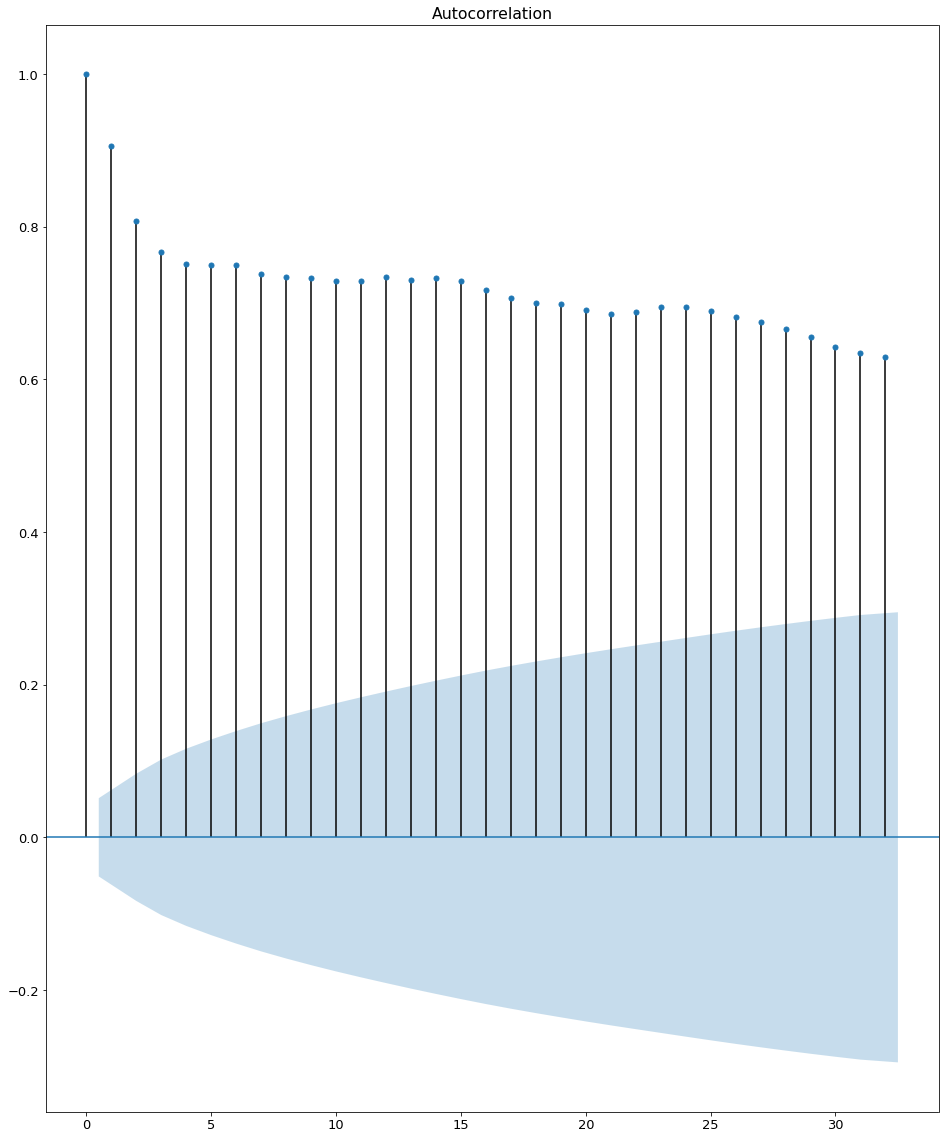

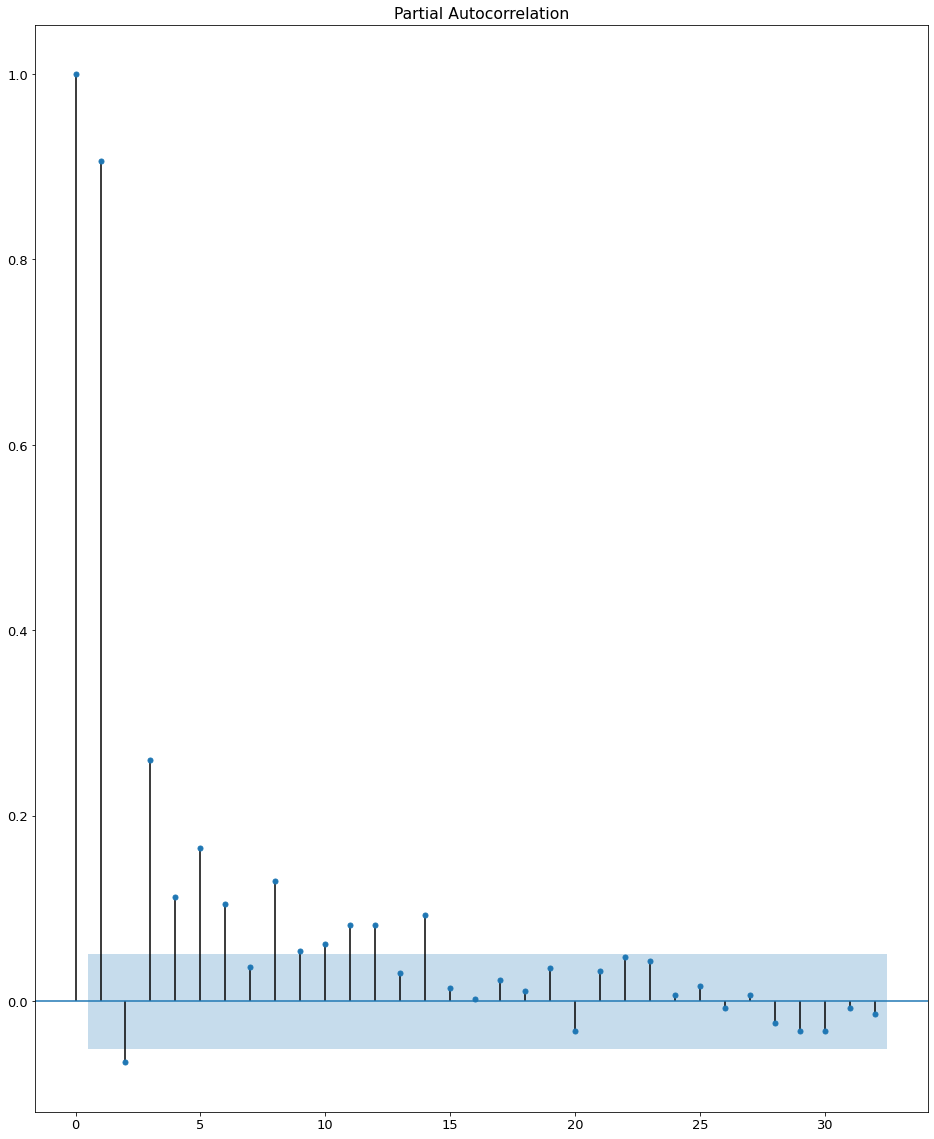

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.figure(figsize=(12,4))
plot_acf(pres_daily)
plot_pacf(pres_daily)


In [ ]:
def plotdiff(df,i):
  diff_df = df.diff(i)
  plt.figure(figsize=(12,4))
  plot_acf(diff_df.dropna())
  plot_pacf(diff_df.dropna())

<Figure size 864x288 with 0 Axes>

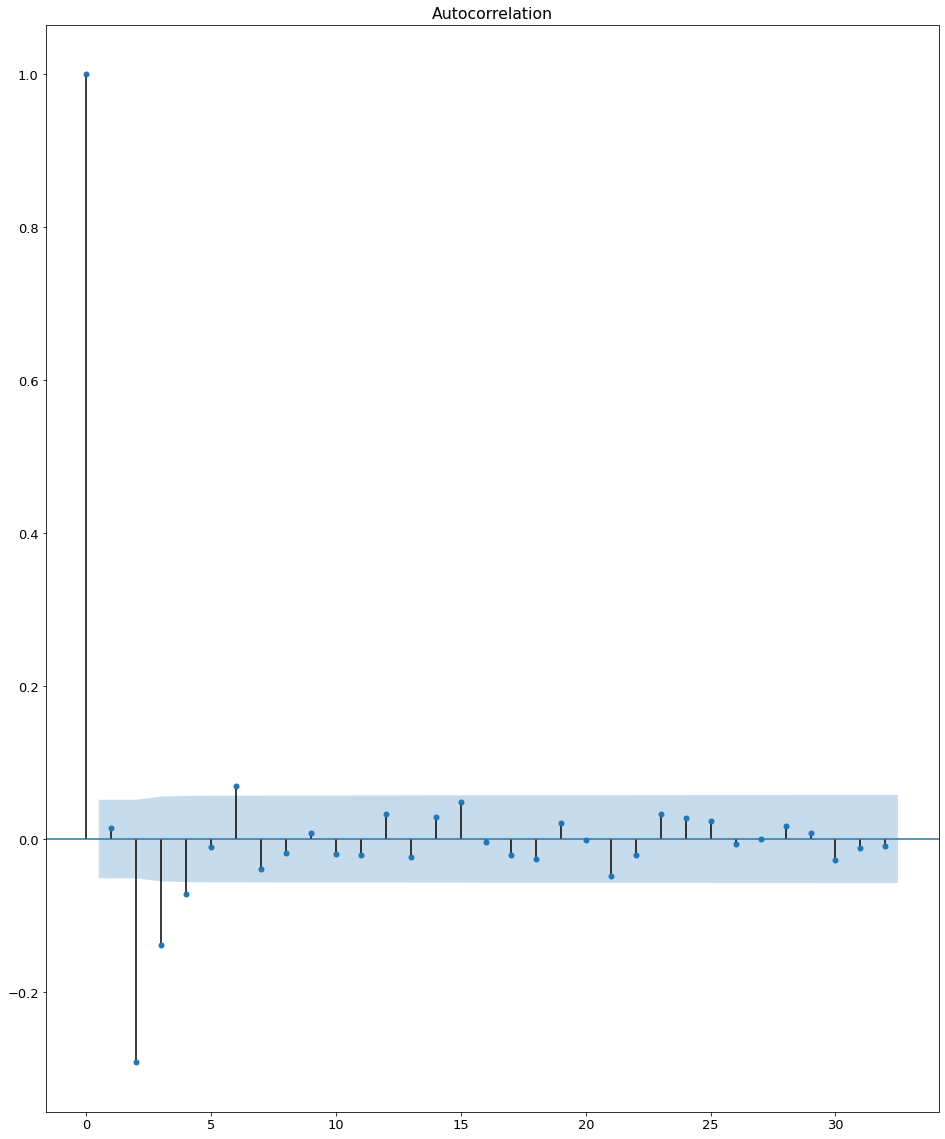

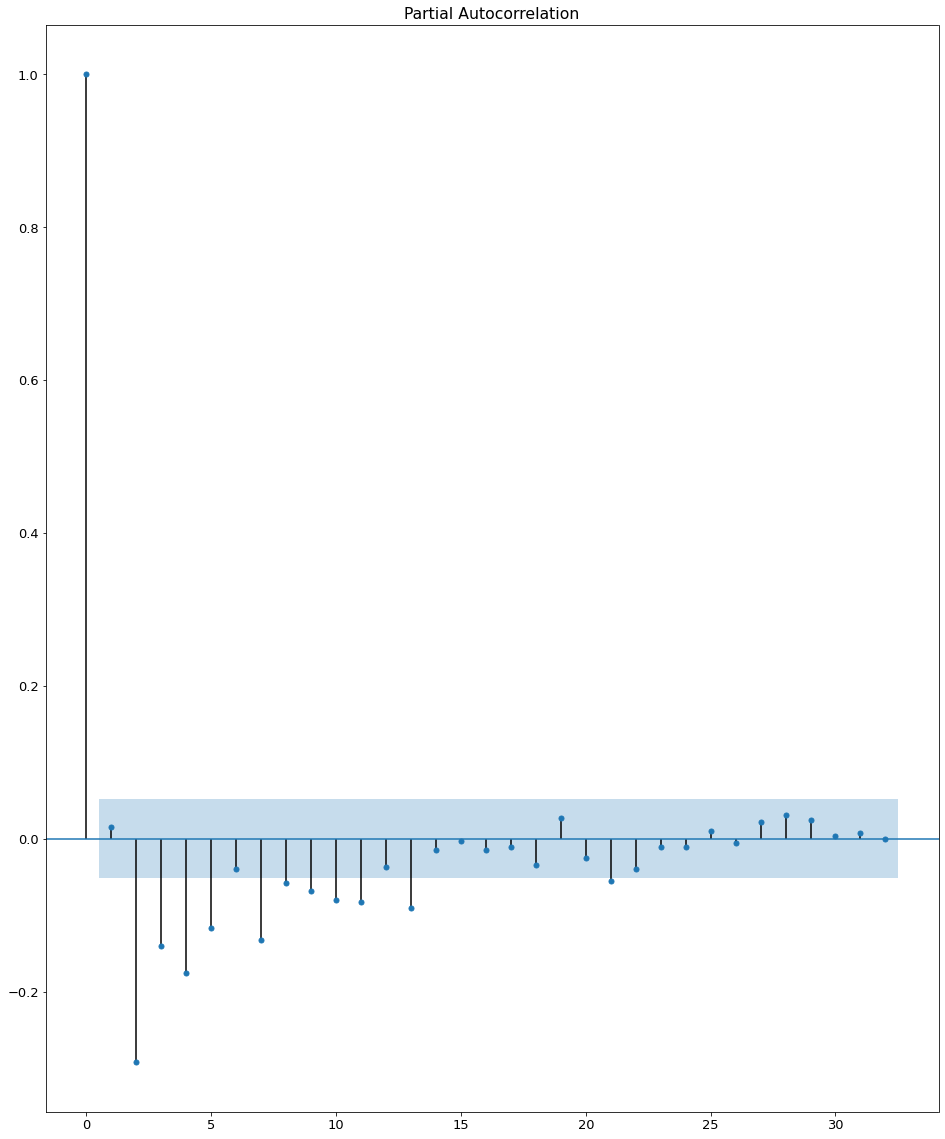

In [ ]:
plotdiff(pres_daily,1)

<Figure size 864x288 with 0 Axes>

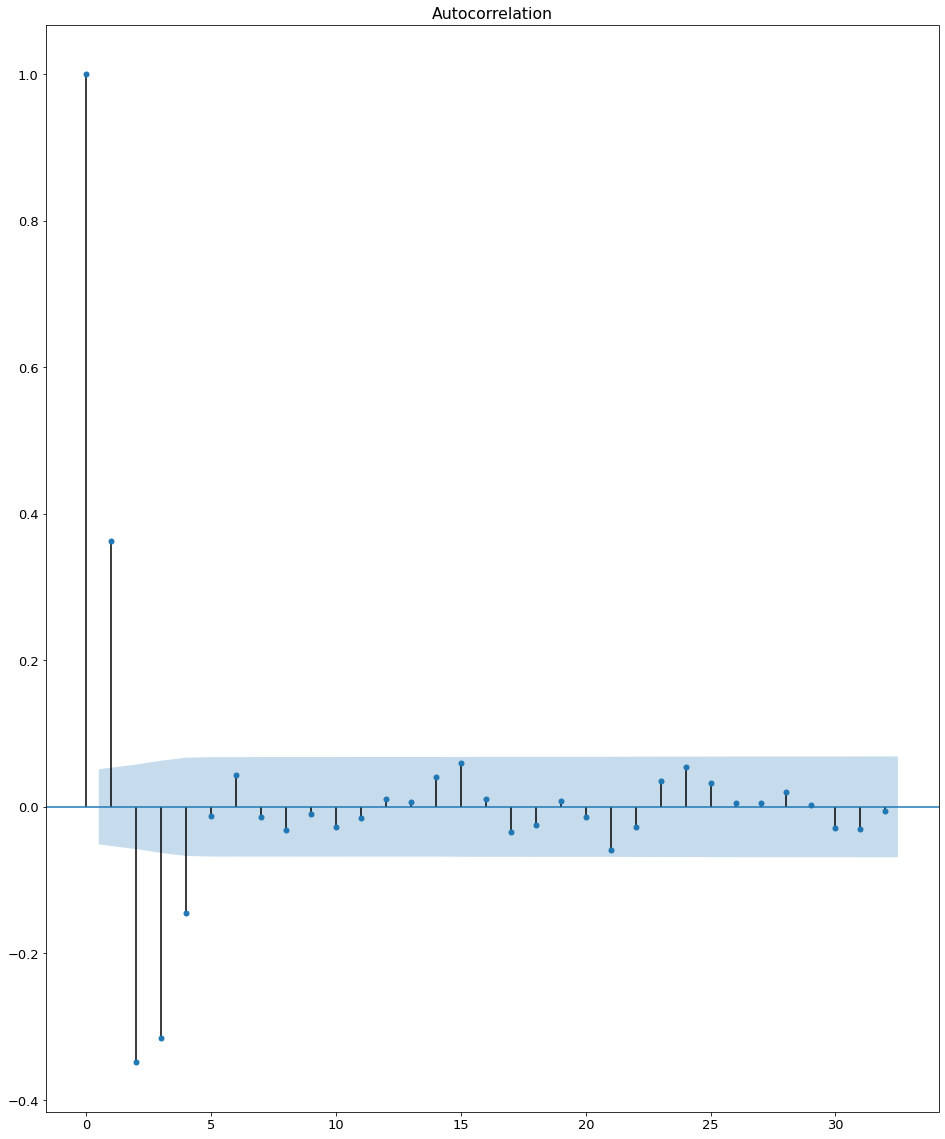

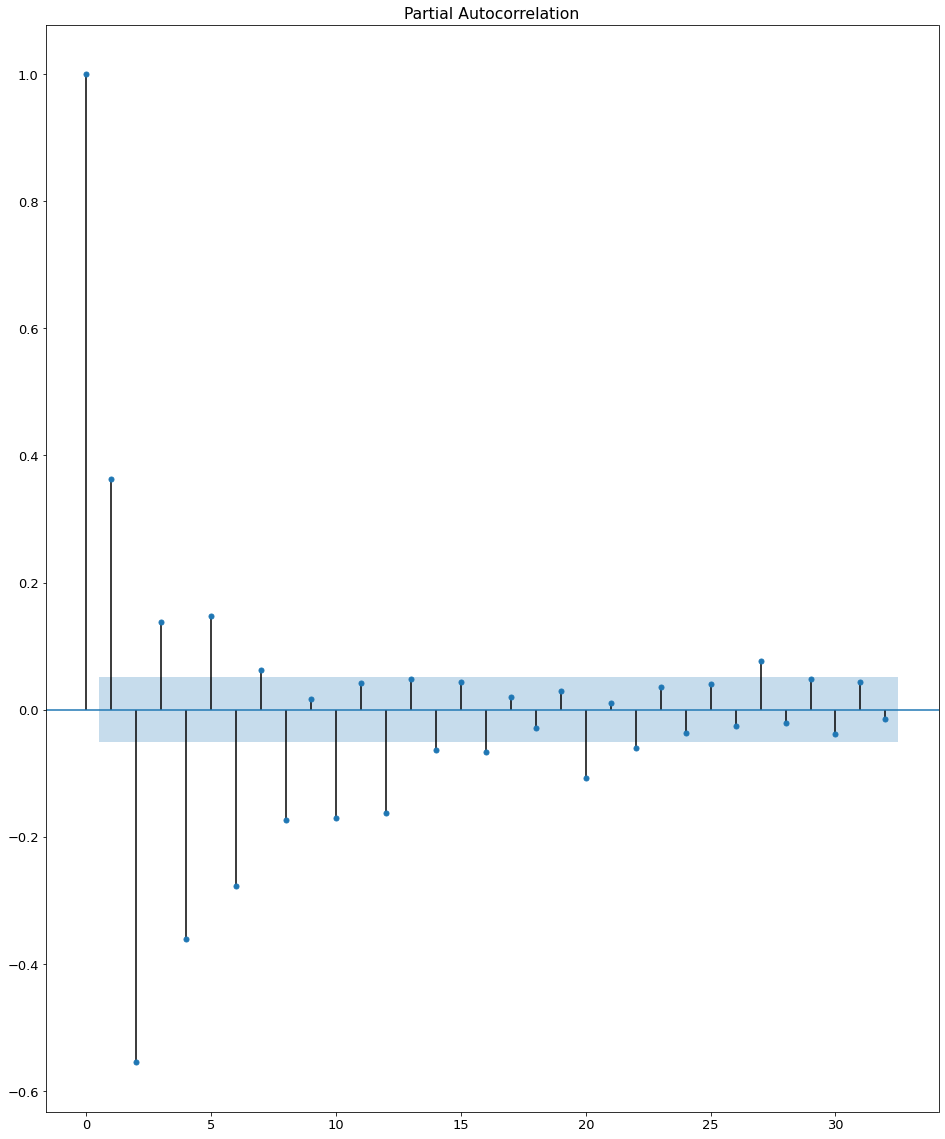

In [ ]:
plotdiff(pres_daily,2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
mod = ARIMA(pres_daily, order=(1, 1, 1))
res = mod.fit()
print(res.summary())




                               SARIMAX Results                                
Dep. Variable:                   PRES   No. Observations:                35064
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -45468.792
Date:                Sun, 21 Feb 2021   AIC                          90943.584
Time:                        16:12:02   BIC                          90968.979
Sample:                    03-01-2013   HQIC                         90951.672
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7978      0.017     45.704      0.000       0.764       0.832
ma.L1         -0.7383      0.019    -39.643      0.000      -0.775      -0.702
sigma2         0.7832      0.003    273.025      0.0

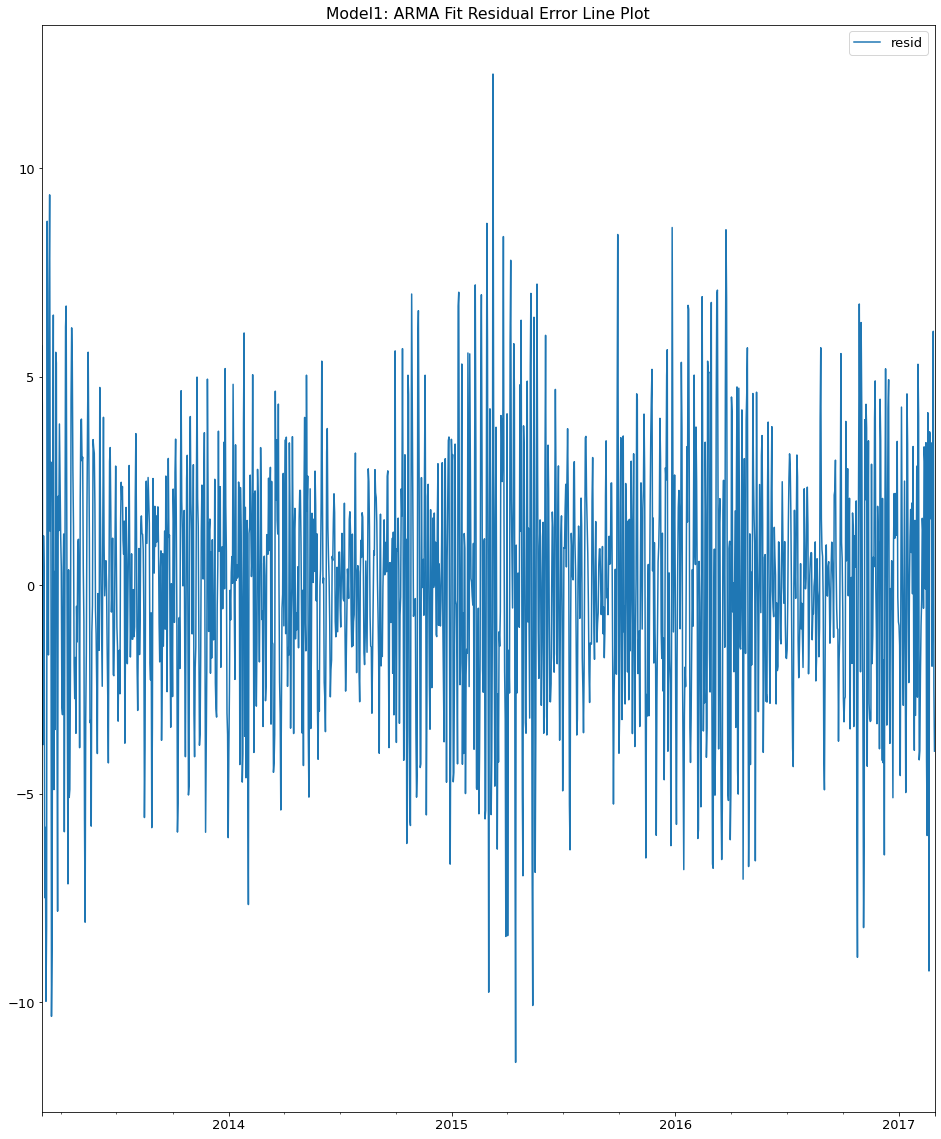

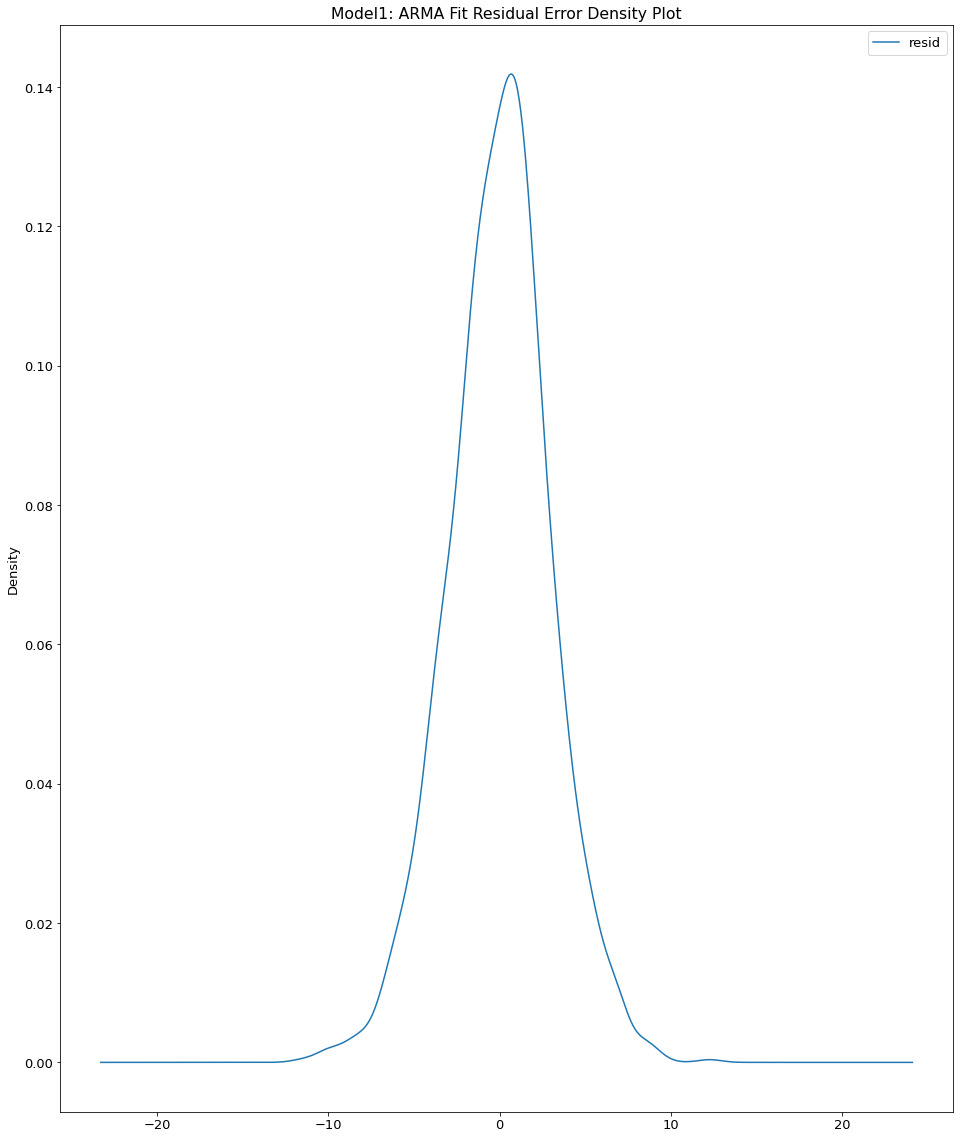

             resid
count  1461.000000
mean     -0.004039
std       3.000496
min     -11.448129
25%      -1.860286
50%       0.126226
75%       1.843135
max      12.261629


In [ ]:
residuals1 = pd.DataFrame(res.resid)
residuals1.plot()
plt.title('Model1: ARMA Fit Residual Error Line Plot')
plt.show()

residuals1.plot(kind='kde')
plt.title('Model1: ARMA Fit Residual Error Density Plot')
plt.show()
print(residuals1.describe())

In [ ]:
mod2 = ARIMA(pres_daily, order=(5, 2, 5))
res2 = mod2.fit()
print(res2.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                   PRES   No. Observations:                 1461
Model:                 ARIMA(5, 2, 5)   Log Likelihood               -4072.303
Date:                Sun, 21 Feb 2021   AIC                           8166.606
Time:                        16:31:23   BIC                           8224.747
Sample:                    03-01-2013   HQIC                          8188.296
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0852      0.037     -2.331      0.020      -0.157      -0.014
ar.L2         -0.4232      0.035    -11.930      0.000      -0.493      -0.354
ar.L3         -0.4923      0.043    -11.463      0.0

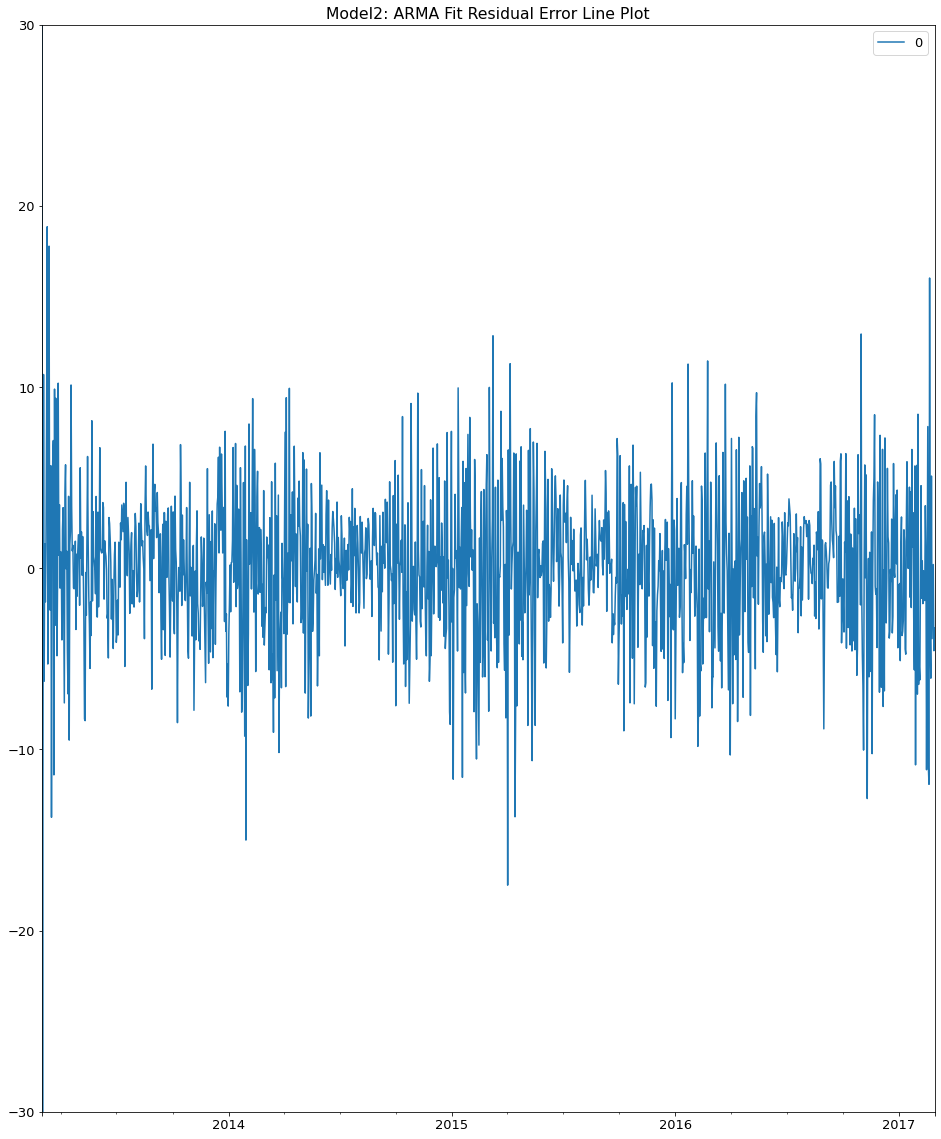

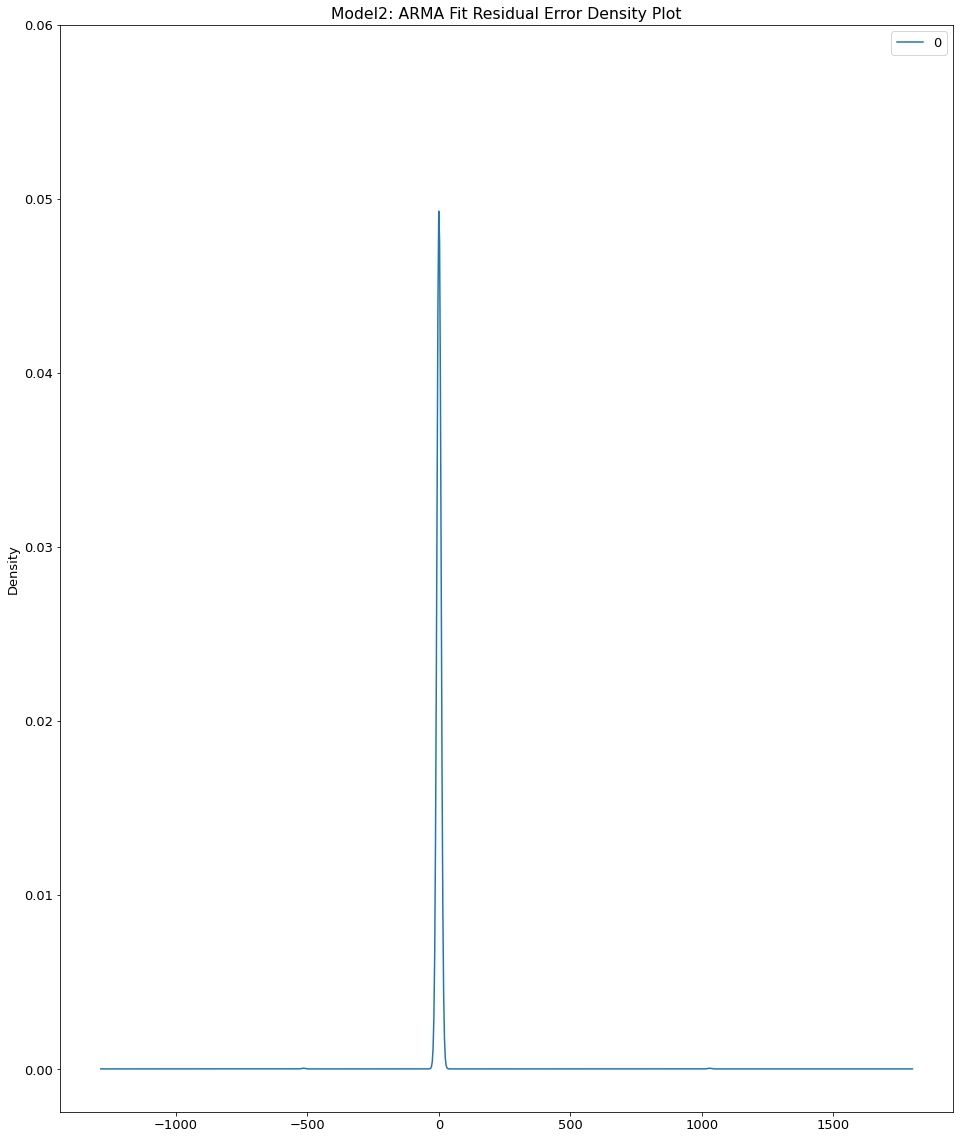

                 0
count  1461.000000
mean      0.383633
std      30.360202
min    -514.327366
25%      -2.297986
50%       0.211398
75%       2.488070
max    1028.783333


In [ ]:
residuals2 = pd.DataFrame(res2.resid)

residuals2.plot()
plt.title('Model2: ARMA Fit Residual Error Line Plot')

x1,x2,y1,y2 = plt.axis()

plt.axis((x1,x2,-30,30))
plt.show()
residuals2.plot(kind='kde')
plt.title('Model2: ARMA Fit Residual Error Density Plot')
x1,x2,y1,y2 = plt.axis()

plt.axis((x1,x2,y1,0.06))
plt.show()
print(residuals2.describe())

In [ ]:
pres_train_test = pd.Series(pres_daily)
train = pres_train_test[:-15]
test = pres_train_test[-15:]

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


predicted=1022.507308, expected=1021.685417
predicted=1022.045532, expected=1017.264583
predicted=1018.809368, expected=1021.293750
predicted=1021.605646, expected=1028.645833
predicted=1026.909189, expected=1029.751389
predicted=1027.856152, expected=1027.989583
predicted=1026.733293, expected=1026.741667
predicted=1025.930803, expected=1029.329167
predicted=1027.875186, expected=1026.763238
predicted=1026.131900, expected=1030.006250
predicted=1028.537380, expected=1026.731250
predicted=1026.280651, expected=1031.261806
predicted=1029.605551, expected=1031.511806
predicted=1029.924503, expected=1032.834722
predicted=1031.018081, expected=1028.163194
predicted=1027.773244, expected=1020.228472
predicted=1022.043618, expected=1026.711458
predicted=1026.601791, expected=1017.918750
predicted=1020.236197, expected=1025.059028
predicted=1025.223793, expected=1032.658333
predicted=1030.708298, expected=1025.045833
predicted=1025.362421, expected=1032.754167
predicted=1030.903657, expected=

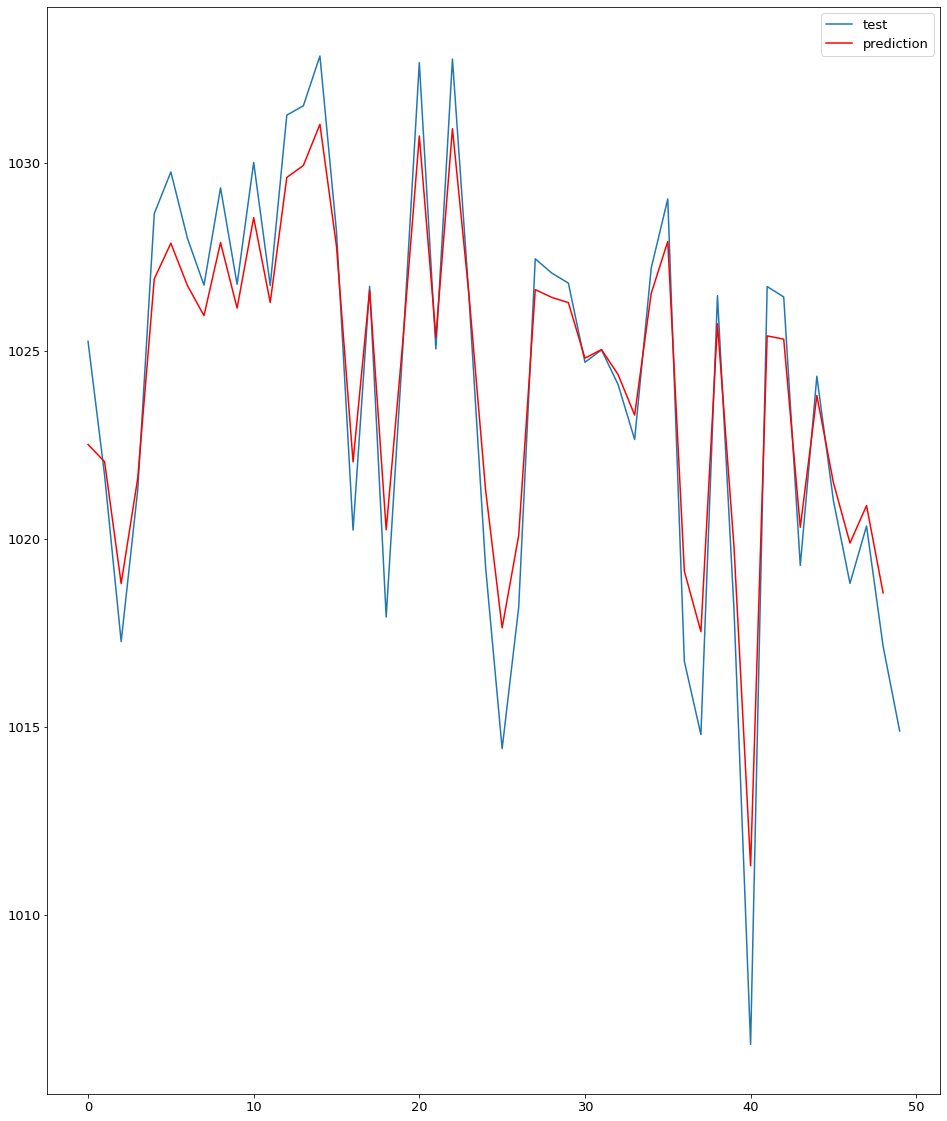

In [ ]:
from sklearn.metrics import r2_score

X = pres_train_test
train, test = X[0:-50], X[-50:]
history = [x for x in train]
predictions = list()

for t in range(len(test)-1):
	model = ARIMA(history, order=(1,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t+1]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = r2_score(test[1:], predictions)
MAPE = mean_absolute_percentage_error(test[1:], predictions)
print('Test R2: %.3f' % error)
print('Test MAPE: %.3f' % MAPE)

# plot
plt.plot(np.array(test))
plt.plot(predictions, color='red')
plt.legend(['test','prediction'])
plt.show()

In [ ]:
pres_daily

2013-03-01    1028.783333
2013-03-02    1028.850000
2013-03-03    1016.458333
2013-03-04    1019.454167
2013-03-05    1012.704167
                 ...     
2017-02-24    1021.012500
2017-02-25    1018.812500
2017-02-26    1020.337500
2017-02-27    1017.141667
2017-02-28    1014.887500
Freq: D, Name: PRES, Length: 1461, dtype: float64

No handles with labels found to put in legend.


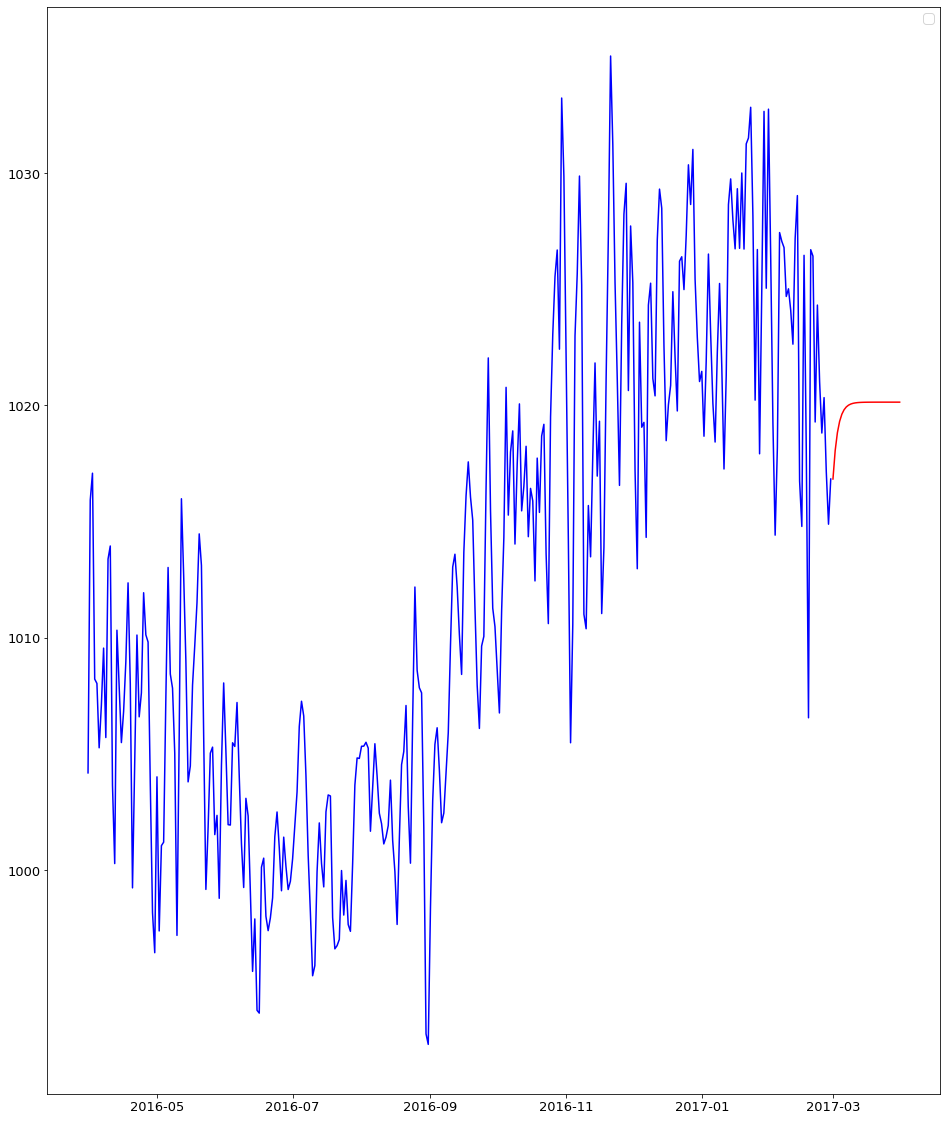

In [ ]:
forecastTime = pd.Series(forecast,index=pd.date_range('2017-3-1', periods=31, freq='D'),name='PRESSURE')
plt.plot(forecastTime,color='red')
historyTime = pd.Series(history[-365:-30],index=pd.date_range('2016-3-31', periods = len(history[-365:-30]),freq='D'),name='PRESSURE')
plt.plot(historyTime,color='blue')
plt.legend()
plt.show()

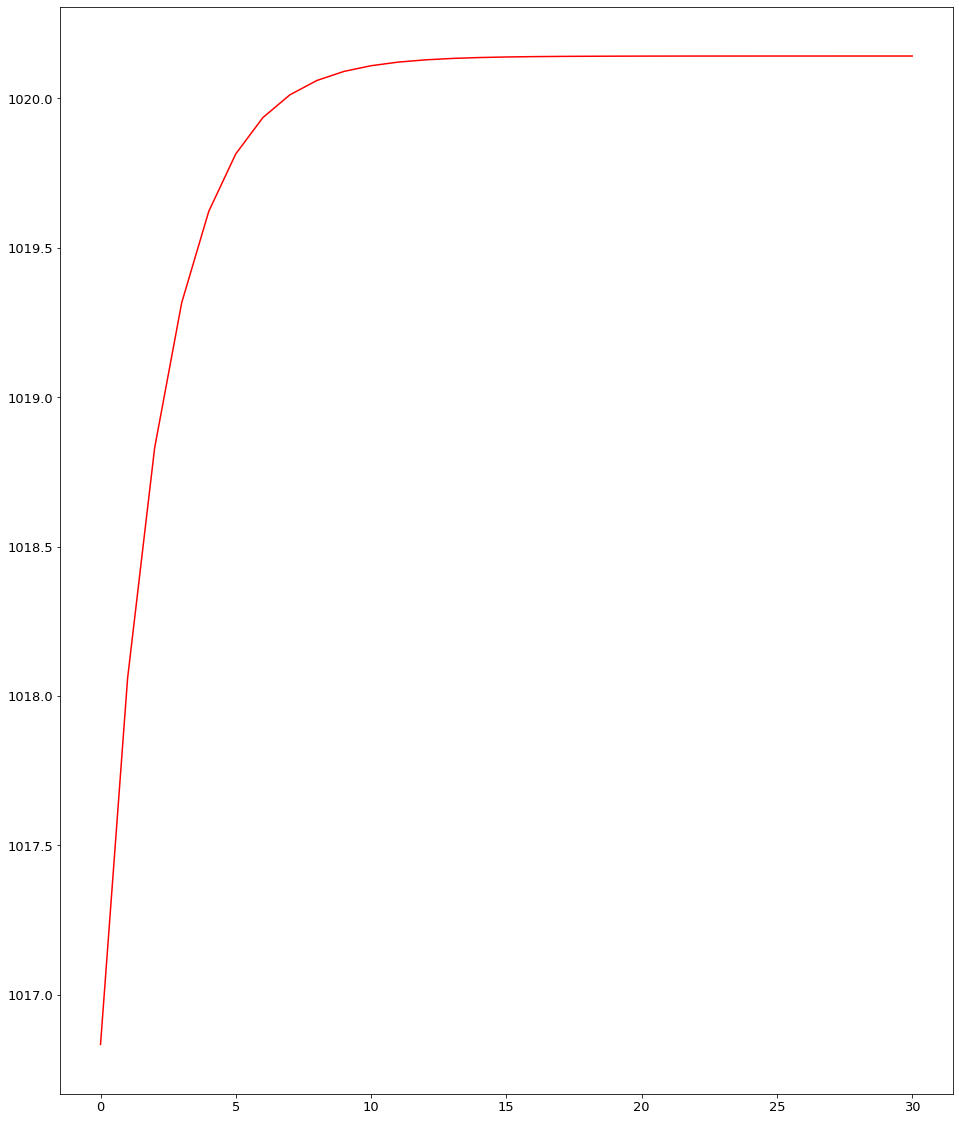

In [ ]:
from datetime import date,timedelta
history = [x for x in pres_daily]
startday = date(2017,3,1)
endday = date(2017,3,31)
days = (endday-startday).days+1
# today=startday
forecast=[]
for i in range(0,days):
  model = ARIMA(history, order=(1,1,1))
  model_fit = model.fit()
  res = model_fit.forecast()[0]
  forecast.append(res)
  history.append(res)
 


plt.plot(forecast,color='red')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sta

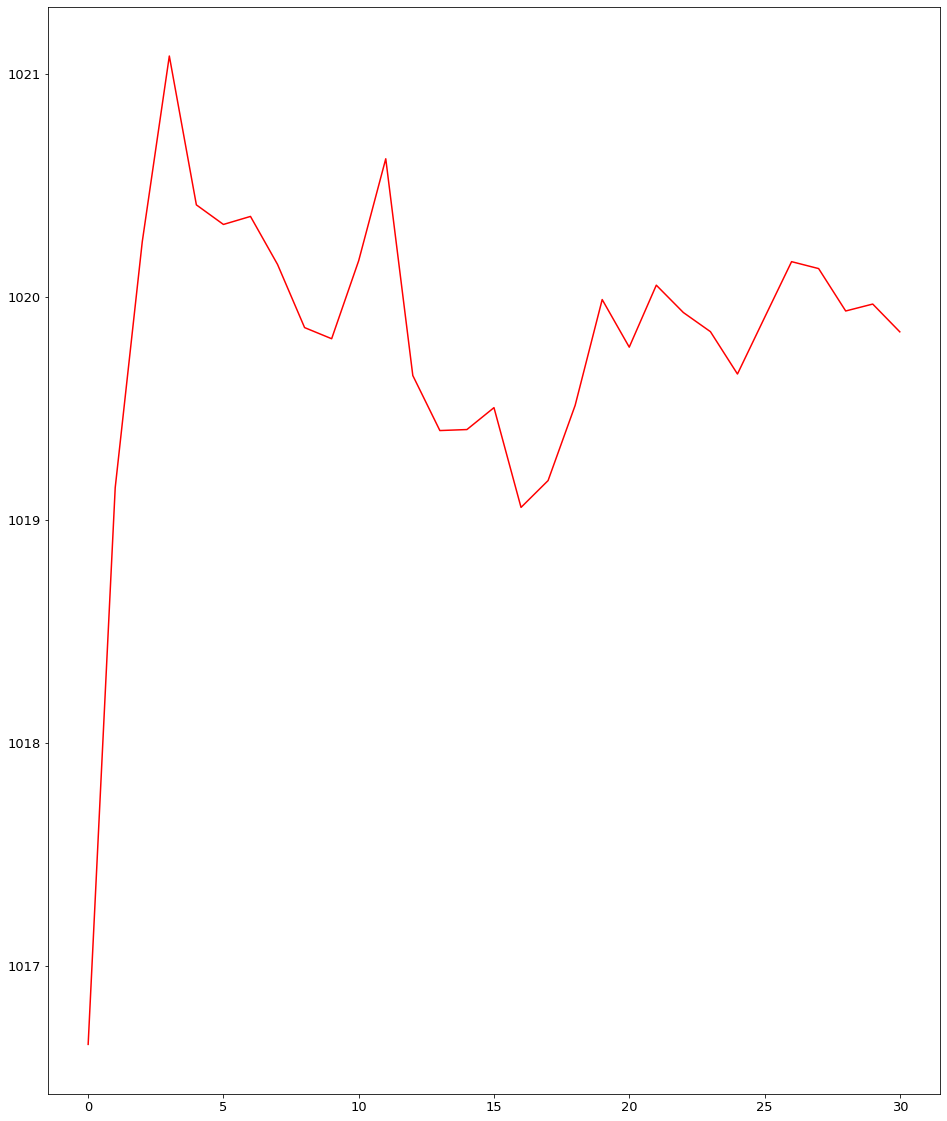

In [ ]:
from datetime import date,timedelta
history = [x for x in pres_daily]
startday = date(2017,3,1)
endday = date(2017,3,31)
days = (endday-startday).days+1
# today=startday
forecast=[]
for i in range(0,days):
  model = ARIMA(history, order=(5,2,5))
  model_fit = model.fit()
  res = model_fit.forecast()[0]
  forecast.append(res)
  history.append(res)
 


plt.plot(forecast,color='red')


No handles with labels found to put in legend.


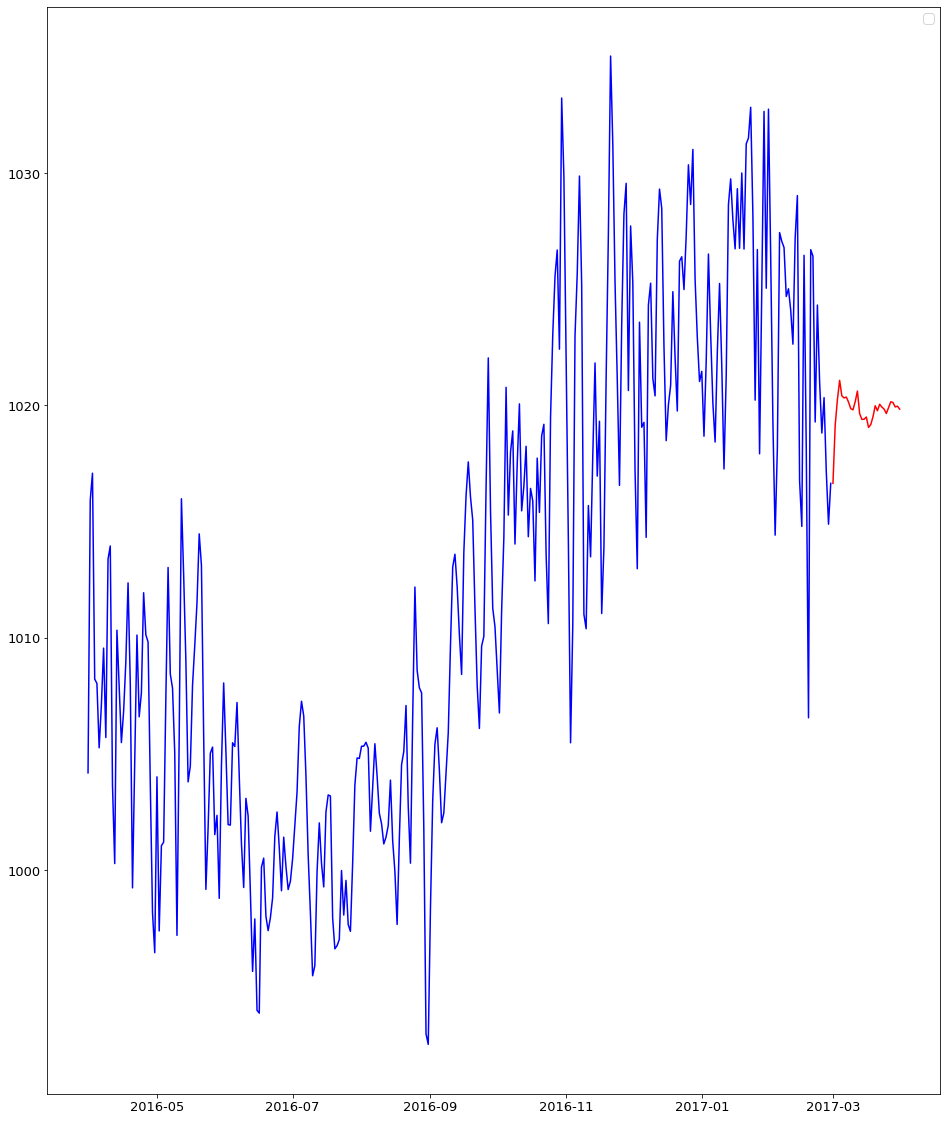

In [ ]:
forecastTime = pd.Series(forecast,index=pd.date_range('2017-3-1', periods=31, freq='D'),name='PRESSURE')
plt.plot(forecastTime,color='red')
historyTime = pd.Series(history[-365:-30],index=pd.date_range('2016-3-31', periods = len(history[-365:-30]),freq='D'),name='PRESSURE')
plt.plot(historyTime,color='blue')
plt.legend()
plt.show()

In [ ]:
pres_daily[-50:]

2017-01-10    1025.250000
2017-01-11    1021.685417
2017-01-12    1017.264583
2017-01-13    1021.293750
2017-01-14    1028.645833
2017-01-15    1029.751389
2017-01-16    1027.989583
2017-01-17    1026.741667
2017-01-18    1029.329167
2017-01-19    1026.763238
2017-01-20    1030.006250
2017-01-21    1026.731250
2017-01-22    1031.261806
2017-01-23    1031.511806
2017-01-24    1032.834722
2017-01-25    1028.163194
2017-01-26    1020.228472
2017-01-27    1026.711458
2017-01-28    1017.918750
2017-01-29    1025.059028
2017-01-30    1032.658333
2017-01-31    1025.045833
2017-02-01    1032.754167
2017-02-02    1026.412500
2017-02-03    1019.250000
2017-02-04    1014.416667
2017-02-05    1018.176389
2017-02-06    1027.441667
2017-02-07    1027.062500
2017-02-08    1026.795833
2017-02-09    1024.691667
2017-02-10    1025.020833
2017-02-11    1024.100000
2017-02-12    1022.637500
2017-02-13    1027.195833
2017-02-14    1029.033333
2017-02-15    1016.741667
2017-02-16    1014.791667
2017-02-17  

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1024.293958, expected=1017.264583


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1017.658463, expected=1021.293750


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1024.004090, expected=1028.645833


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1028.379261, expected=1029.751389


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1027.932126, expected=1027.989583


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1026.050811, expected=1026.741667


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1025.657323, expected=1029.329167


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1028.206865, expected=1026.763238


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1025.841700, expected=1030.006250


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1028.581904, expected=1026.731250


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1025.321352, expected=1031.261806


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1030.461906, expected=1031.511806


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1029.313588, expected=1032.834722


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1030.401525, expected=1028.163194


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1027.042806, expected=1020.228472


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1020.720851, expected=1026.711458


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1028.506493, expected=1017.918750


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1019.231742, expected=1025.059028


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1027.874523, expected=1032.658333


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1032.102350, expected=1025.045833


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1023.610252, expected=1032.754167


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1032.761752, expected=1026.412500


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1025.664418, expected=1019.250000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1020.289690, expected=1014.416667


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1017.911987, expected=1018.176389


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1022.556802, expected=1027.441667


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1029.536369, expected=1027.062500


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1026.978601, expected=1026.795833


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1026.651775, expected=1024.691667


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1024.888554, expected=1025.020833


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1025.721518, expected=1024.100000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1024.426035, expected=1022.637500


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1023.678643, expected=1027.195833


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1027.522681, expected=1029.033333


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1028.168751, expected=1016.741667


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1017.880512, expected=1014.791667


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1018.803287, expected=1026.462500


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1028.875615, expected=1018.104167


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1018.293116, expected=1006.554167


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=1011.633444, expected=1026.704167


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1030.550399, expected=1026.429167


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1023.485063, expected=1019.287500


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1020.789484, expected=1024.320833


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1024.894933, expected=1021.012500


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1019.366793, expected=1018.812500


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1019.297545, expected=1020.337500


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1020.894261, expected=1017.141667


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1018.833825, expected=1014.887500
Test R2: 0.027
Test MAPE: 0.434


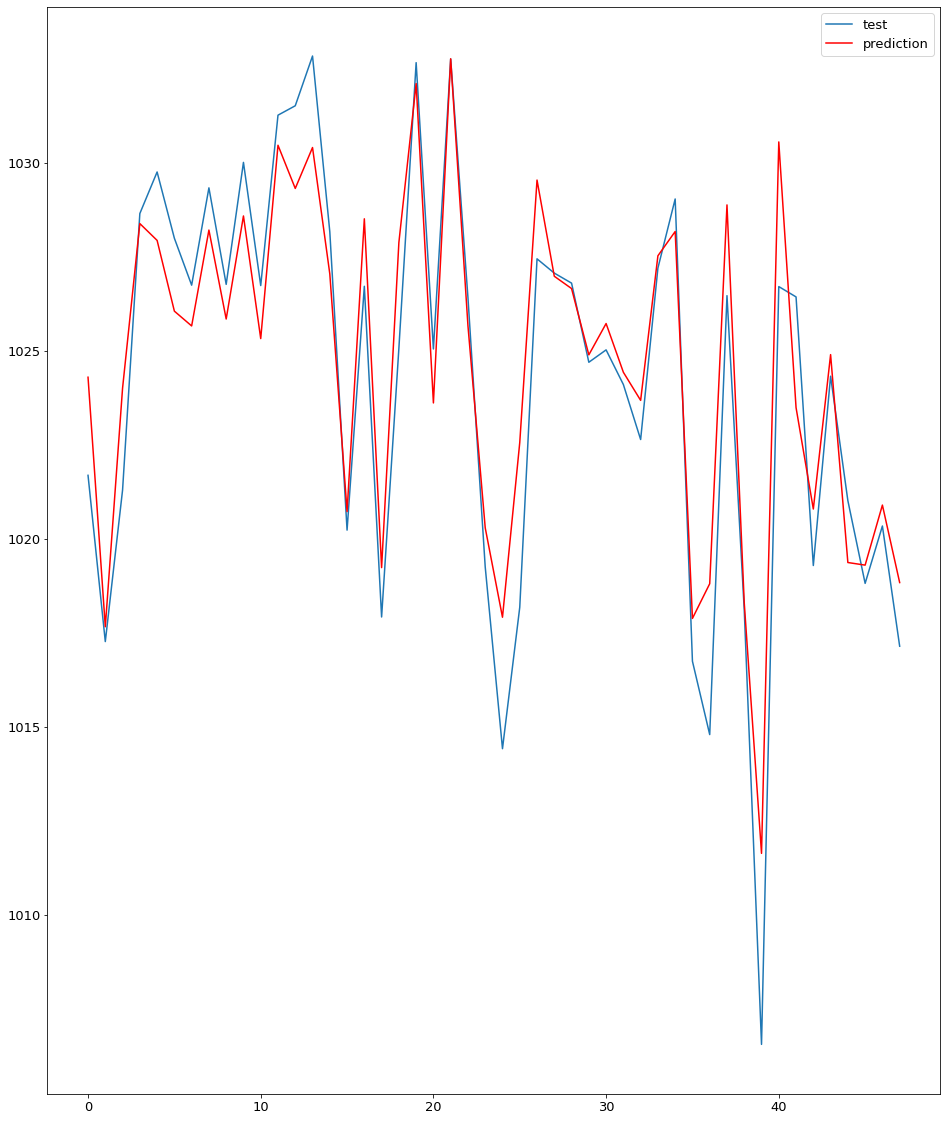

In [ ]:

X = pres_train_test
train, test = X[0:-50], X[-50:]
history = [x for x in train]
predictions = list()

for t in range(len(test)-2):
	model = ARIMA(history, order=(5,2,5))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t+2]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = r2_score(test[2:], predictions)
print('Test R2: %.3f' % error)
MAPE = mean_absolute_percentage_error(test[2:], predictions)
print('Test MAPE: %.3f' % MAPE)

# plot
plt.plot(np.array(test[1:-1]))
plt.plot(predictions, color='red')
plt.legend(['test','prediction'])
plt.show()